In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
goal_dist = 2.0
max_vel = 1.0  # m/s
dt = 0.005 * 6
max_improv_per_step = max_vel * dt
realistic_coef = 0.5
realistic_improv = max_improv_per_step * realistic_coef

In [3]:
realistic_iters = goal_dist / (max_improv_per_step * realistic_coef)
realistic_iters = int(realistic_iters)
realistic_iters

133

## Difference of (scaled) normalized euclidean potentials


In [15]:
gamma = 0.999
coef = 20.0
step_penalty = -0.05
rewards_potential = np.zeros(realistic_iters - 1)
for i in range(1, realistic_iters):
    dist_prev = goal_dist - (i - 1) * realistic_improv
    dist_curr = goal_dist - i * realistic_improv
    delta_phi = dist_prev - gamma * dist_curr  # positive if the distance is decreasing
    rewards_potential[i - 1] = delta_phi * coef + step_penalty

(np.float64(0.25040000000000245),
 np.float64(0.2896999999999961),
 np.float64(0.27005),
 np.float64(0.011431207285322046))

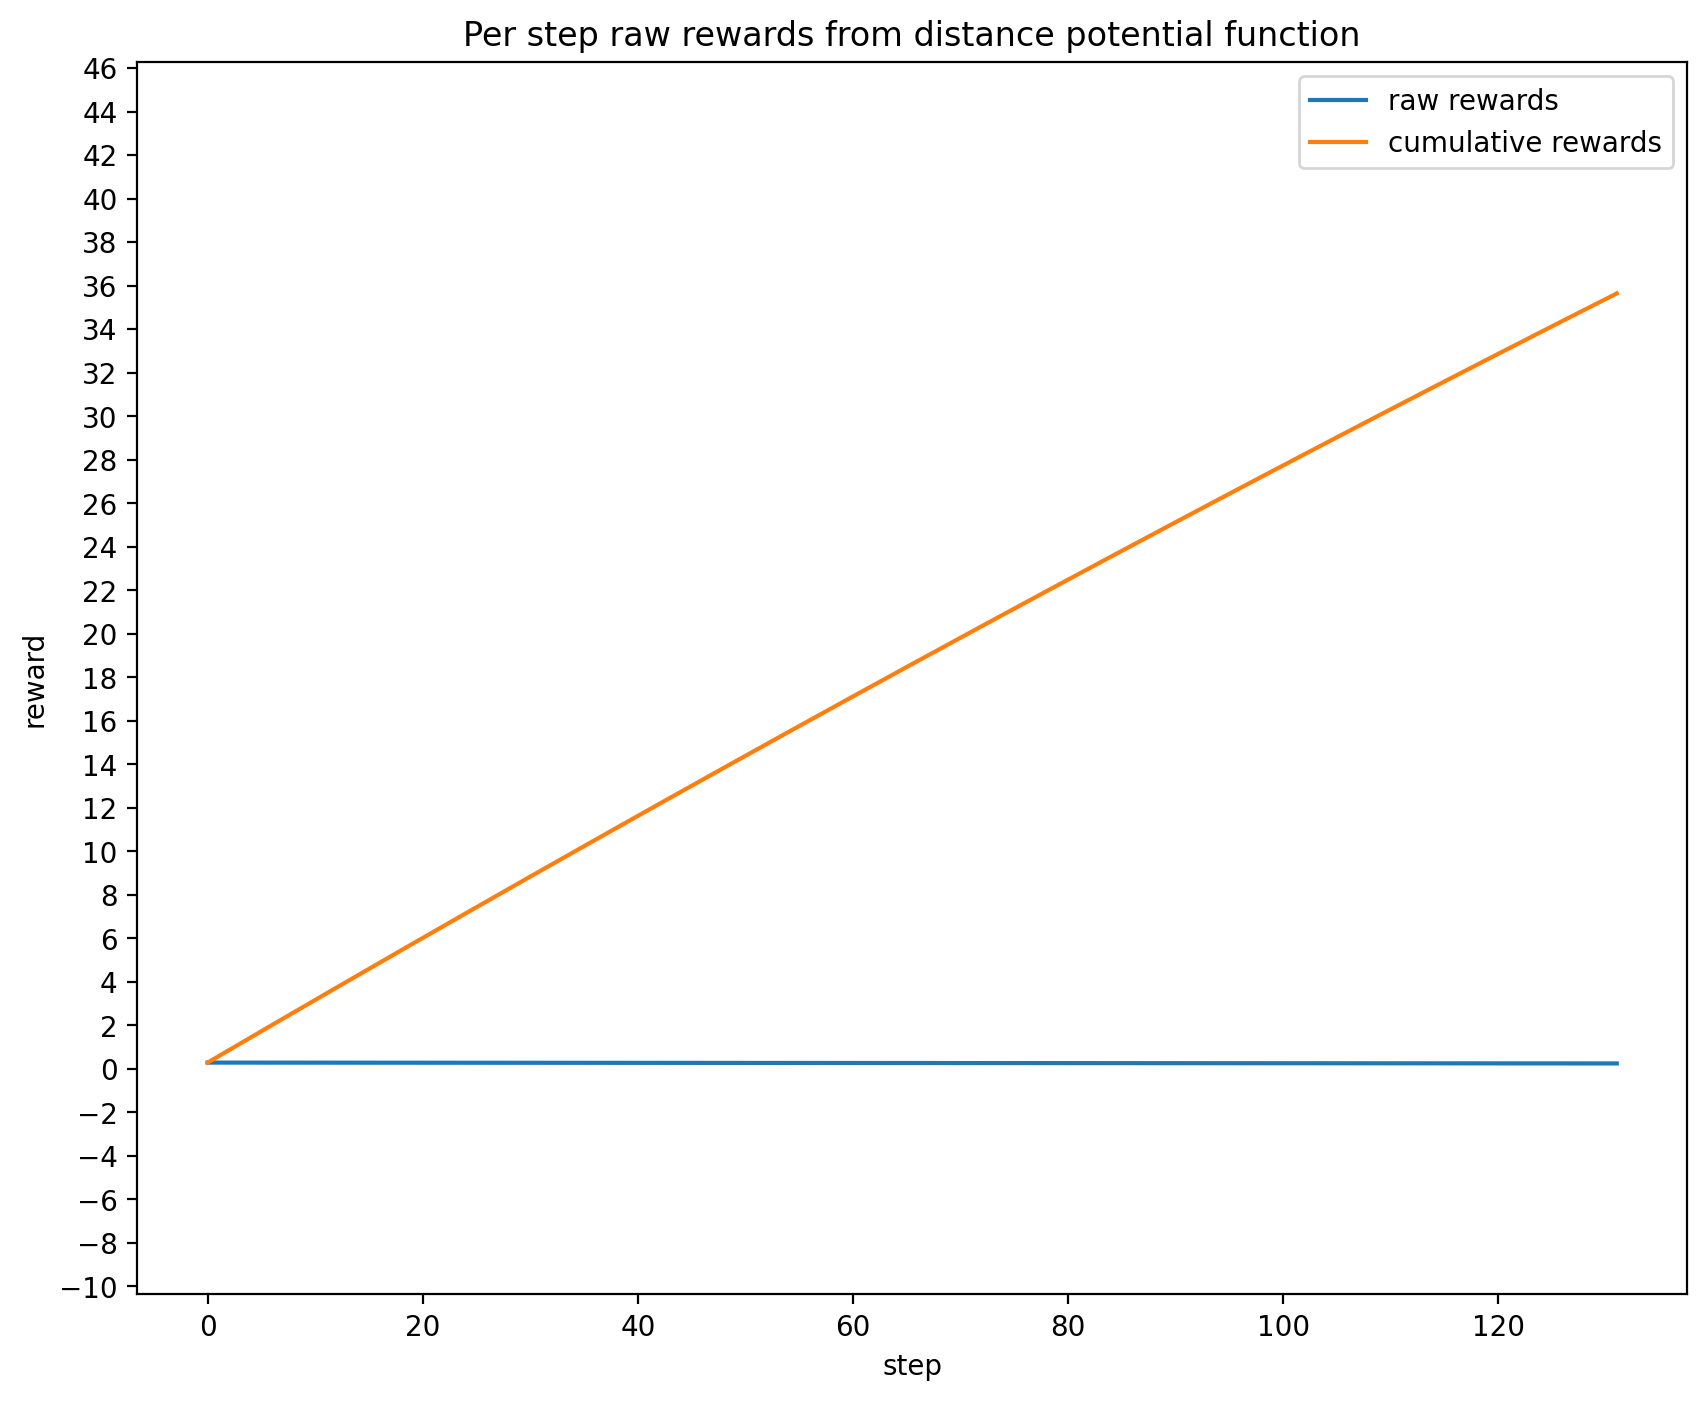

In [16]:
plt.figure(figsize=(10,8), dpi=200)
plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential, label="raw rewards")
plt.plot(np.cumsum(rewards_potential), label="cumulative rewards")
plt.xlabel("step")
plt.ylabel("reward")

# add a 30% margin above/below min/max
plt.margins(y=0.3)

# force more ticks on the y‑axis
plt.locator_params(axis="y", nbins=50)
plt.legend()

# still print your stats
np.min(rewards_potential), np.max(rewards_potential), np.mean(rewards_potential), np.std(rewards_potential)
